In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AutomobileClaim.csv')
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [5]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           1
Claim Reason                     1
Sales Channel                    1
Total Claim Amount               1
Vehicle Class                    1
Vehicle Size                     1
dtype: int64

In [6]:
df.shape

(9134, 26)

In [7]:
df.dropna(axis =0 ,inplace=True)  # only five recordshaving null .so dropping that rows

In [8]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9133.000000,9133.00000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000,9133.000000
mean,800.553098,37661.50323,93.221066,15.098325,48.060002,0.384430,2.966386,434.095855
std,687.111201,30379.01207,34.409433,10.073013,27.904068,0.910424,2.390224,290.515213
min,189.800768,0.00000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.535820,0.00000,68.000000,6.000000,24.000000,0.000000,1.000000,272.217171
50%,578.018220,33897.00000,83.000000,14.000000,48.000000,0.000000,2.000000,384.000000
75%,896.279598,62326.00000,109.000000,23.000000,71.000000,0.000000,4.000000,547.619785
max,8332.538119,99981.00000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


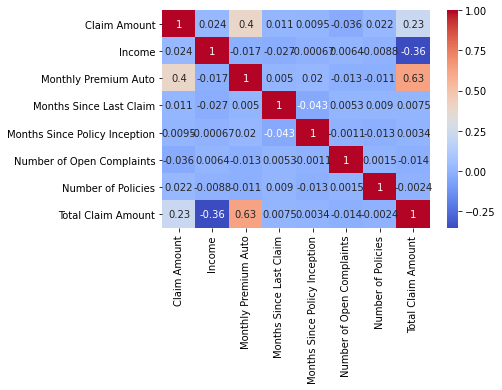

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

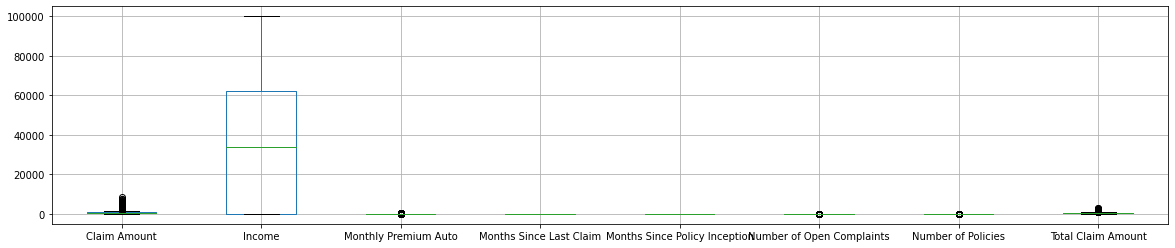

In [11]:
plt.figure(figsize=(20,4))
df.boxplot()

In [12]:
from scipy.stats import zscore

In [13]:
numeric_columns = df.loc[:,df.dtypes !='object'].columns
df[numeric_columns]

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9128,410.039853,47761,104,16,58,0,1,541.282007
9129,2340.598798,71941,73,18,89,0,2,198.234764
9130,309.651122,21604,79,14,28,0,1,379.200000
9131,816.389043,0,85,9,37,3,2,790.784983


In [14]:
df1=df.copy()
z_Score = abs(zscore(df1[numeric_columns]))
print('Original Shape:' , df1.shape)
df2 = df1.loc[(z_Score<3).all(axis=1)]
print('After removing outliers: ',df2.shape)

Original Shape: (9133, 26)
After removing outliers:  (8469, 26)


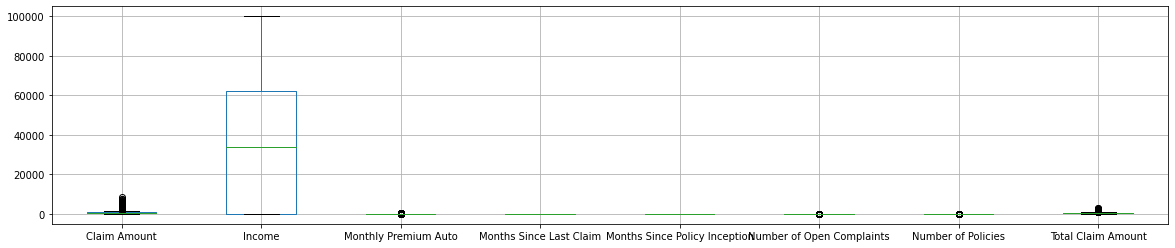

In [15]:
plt.figure(figsize=(20,4))
df.boxplot()

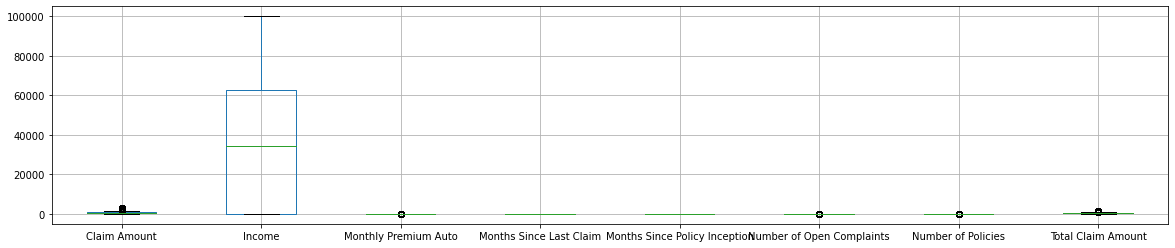

In [16]:
plt.figure(figsize=(20,4))
df2.boxplot()

In [17]:
numeric_columns = df2.loc[:,df.dtypes == 'object'].columns
df2[numeric_columns]

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,HB64268,US,KS,Kansas,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,US,MO,Missouri,No,Premium,College,1/6/11,Employed,F,Suburban,Single,Personal Auto,Personal L2,Collision,Branch,Four-Door Car,Large
9129,LA72316,US,MO,Missouri,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Hail,Web,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Collision,Branch,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Collision,Branch,Four-Door Car,Medsize


In [18]:
df2.loc[:,'Customer':'EmploymentStatus'].describe(include='all')

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus
count,8469,8469,8469,8469,8469.000000,8469,8469,8469,8469,8469
unique,8469,1,5,5,NaN,2,3,5,59,5
top,GT17701,US,MO,Missouri,NaN,No,Basic,Bachelor,1/27/11,Employed
freq,1,8469,2917,2917,NaN,7251,5272,2569,186,5293
mean,NaN,NaN,NaN,NaN,714.772192,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,485.848693,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,189.800768,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,388.650481,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,560.881919,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,858.680133,NaN,NaN,NaN,NaN,NaN


In [19]:
df2.loc[:,'Gender':].describe(include='all')

,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,8469,8469.000000,8469,8469,8469.000000,8469.000000,8469.000000,8469.000000,8469.000000,8469,8469,8469,8469,8469.000000,8469,8469
unique,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Collision,Agent,NaN,Four-Door Car,Medsize
freq,4329,NaN,5294,4961,NaN,NaN,NaN,NaN,NaN,6263,3153,3434,3201,NaN,4474,5962
mean,NaN,37889.297202,NaN,NaN,88.793246,15.061282,47.802692,0.293541,2.989845,NaN,NaN,NaN,NaN,402.981390,NaN,NaN
std,NaN,30439.248690,NaN,NaN,26.070371,10.063973,27.882872,0.696697,2.413627,NaN,NaN,NaN,NaN,232.973239,NaN,NaN
min,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,261.930545,NaN,NaN
50%,NaN,34220.000000,NaN,NaN,80.000000,14.000000,47.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,369.614729,NaN,NaN
75%,NaN,62477.000000,NaN,NaN,106.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,528.200860,NaN,NaN


In [20]:
# we can drop customer id - unique id for customer
# Country code we can drop as we are dealing for only US
# we can drop State - as we are having State Code already
# we no need effective to date to predict claim amount
# we can drop Sales Channnel as we no need to prredict claim amount
#we can drop vehicle size
df2.drop(columns=['Customer','State','Country','Effective To Date','Sales Channel','Vehicle Size'],inplace=True)

In [21]:
df2.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Total Claim Amount,Vehicle Class
0,KS,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,384.811147,Two-Door Car
1,NE,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,1131.464935,Four-Door Car
2,OK,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,566.472247,Two-Door Car
3,MO,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,529.881344,SUV
4,KS,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,138.130879,Four-Door Car


In [22]:
df2[df2['Policy Type'] == 'Corporate Auto']['Policy'].value_counts()

Corporate L3    964
Corporate L2    562
Corporate L1    332
Name: Policy, dtype: int64

In [23]:
columns=['Vehicle Class','Claim Reason','Policy','Policy Type','EmploymentStatus','Education','State Code']
for col in columns:
    print(col,':')
    print(df2[col].value_counts(),'\n')

Vehicle Class :
Four-Door Car    4474
Two-Door Car     1831
SUV              1631
Sports Car        435
Luxury Car         50
Luxury SUV         48
Name: Vehicle Class, dtype: int64 

Claim Reason :
Collision       3434
Hail            2750
Scratch/Dent    1336
Other            949
Name: Claim Reason, dtype: int64 

Policy :
Personal L3     3153
Personal L2     1959
Personal L1     1151
Corporate L3     964
Corporate L2     562
Corporate L1     332
Special L2       151
Special L3       136
Special L1        61
Name: Policy, dtype: int64 

Policy Type :
Personal Auto     6263
Corporate Auto    1858
Special Auto       348
Name: Policy Type, dtype: int64 

EmploymentStatus :
Employed         5293
Unemployed       2119
Medical Leave     408
Disabled          383
Retired           266
Name: EmploymentStatus, dtype: int64 

Education :
Bachelor                2569
College                 2474
High School or Below    2422
Master                   687
Doctor                   317
Name: Educati

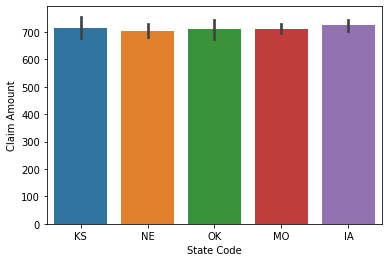

In [24]:
sns.barplot(x='State Code',y='Claim Amount',data=df2)

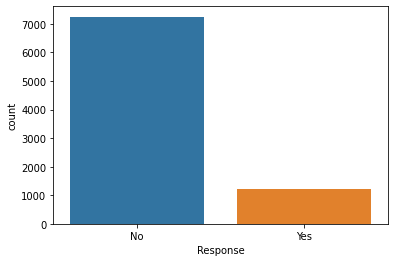

In [25]:
sns.countplot(x=df2.Response)

In [26]:
df2.columns

Index(['State Code', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Total Claim Amount', 'Vehicle Class'],
      dtype='object')

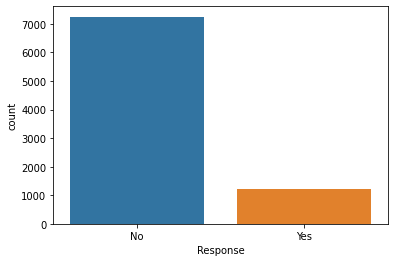

In [27]:
sns.countplot(x=df2.Response)

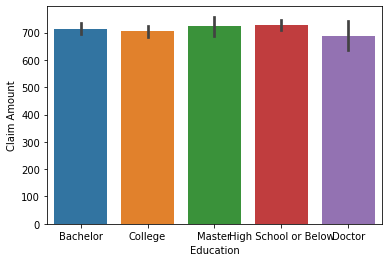

In [28]:
sns.barplot(x='Education',y='Claim Amount',data=df2)

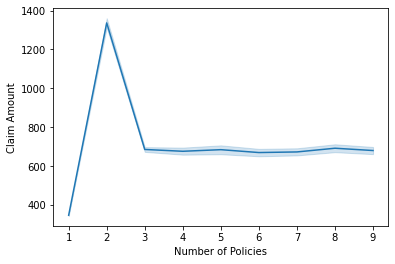

In [29]:
sns.lineplot(x='Number of Policies',y='Claim Amount',data=df2)

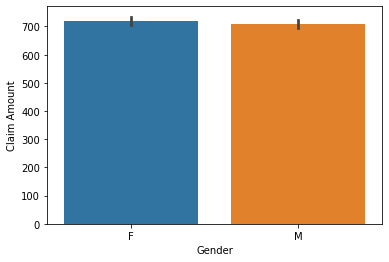

In [30]:
sns.barplot(x='Gender',y='Claim Amount',data=df2)

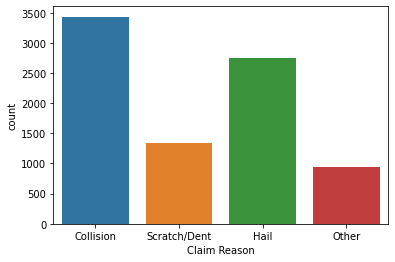

In [31]:
sns.countplot(x='Claim Reason',data=df2)

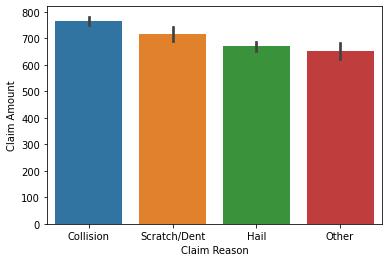

In [32]:
sns.barplot(x='Claim Reason',y='Claim Amount',data=df2)

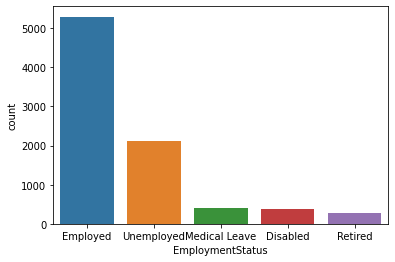

In [33]:
sns.countplot(x='EmploymentStatus',data=df2)

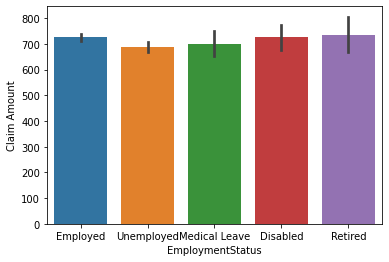

In [34]:
sns.barplot(x='EmploymentStatus',y='Claim Amount',data=df2)

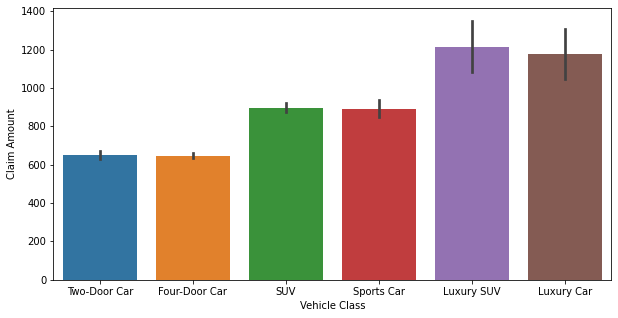

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x='Vehicle Class',y='Claim Amount',data=df2)

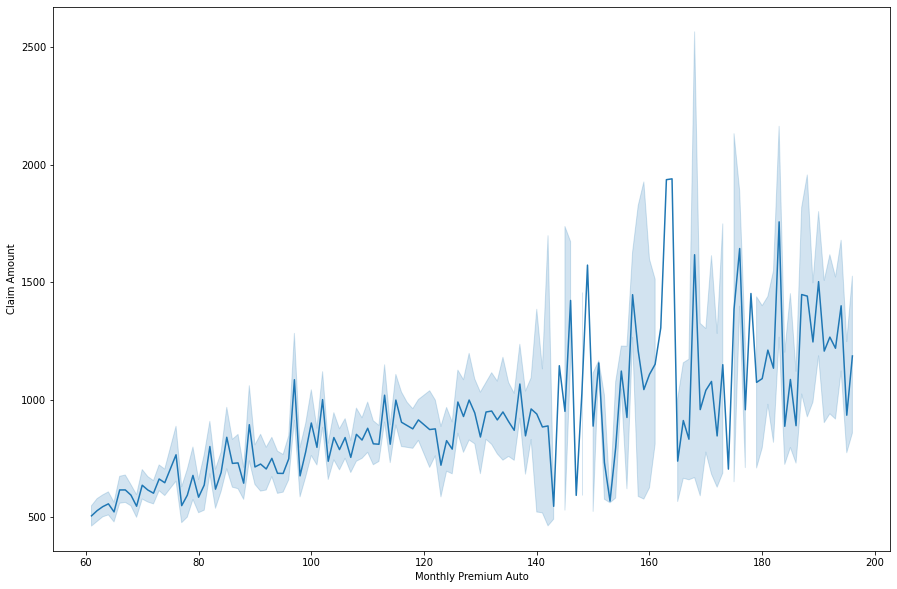

In [36]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Monthly Premium Auto',y='Claim Amount',data=df2)

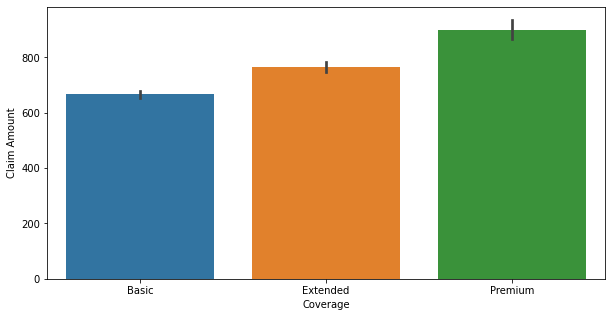

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='Coverage',y='Claim Amount',data=df2)

In [38]:
df2.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Total Claim Amount,Vehicle Class
0,KS,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,384.811147,Two-Door Car
1,NE,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,1131.464935,Four-Door Car
2,OK,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,566.472247,Two-Door Car
3,MO,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,529.881344,SUV
4,KS,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,138.130879,Four-Door Car


In [39]:
col_cat = df2.loc[:,df2.dtypes=='object'].columns

In [40]:
col_cat

Index(['State Code', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Claim Reason', 'Vehicle Class'],
      dtype='object')

In [41]:
df3= df2.copy()
from sklearn.preprocessing import LabelEncoder 
for col in col_cat:
        df3[col]=LabelEncoder().fit_transform(df3[col])

In [42]:
df3.head()

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Total Claim Amount,Vehicle Class
0,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,384.811147,5
1,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,3,1131.464935,0
2,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,566.472247,5
3,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,529.881344,3
4,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,138.130879,0


In [43]:
from sklearn.model_selection import GridSearchCV
def Gridsearchvc(clf,params,cv,X,y):
    return_value=''
    clf = GridSearchCV(clf, params, cv=cv)
    clf.fit(X,y)
    print(clf.best_params_)
    return clf.best_params_

In [44]:
from sklearn.model_selection import train_test_split
X=df3.drop(columns='Claim Amount')
y=df3['Claim Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 100,test_size=0.20)

In [45]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, explained_variance_score ,r2_score
from sklearn.model_selection import cross_val_score
def  model_Anaysis(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('cross_val_score:',cross_val_score(model, X_train, y_train,cv=5).mean())
    print('R2 model score:',model.score(X_test,y_test))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('explained_variance_score:',explained_variance_score(y_test,pred)) 
    print('r2_score:',r2_score(y_test,pred))

In [46]:
from sklearn.linear_model import LinearRegression
model_Anaysis(LinearRegression())

cross_val_score: 0.09749511136221203
R2 model score: 0.0918732797786197
mean_squared_error: 217896.7922971041
mean_absolute_error: 314.5107791601558
explained_variance_score: 0.09187595335614684
r2_score: 0.0918732797786197


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
model_Anaysis(GradientBoostingRegressor())

cross_val_score: 0.7389804170228992
R2 model score: 0.7266533581113412
mean_squared_error: 65587.05423644432
mean_absolute_error: 116.22802192076188
explained_variance_score: 0.7266540415350714
r2_score: 0.7266533581113412


In [48]:
from sklearn.ensemble import AdaBoostRegressor
model_Anaysis(AdaBoostRegressor(n_estimators=70,learning_rate=2.05))

cross_val_score: 0.6893862986964673
R2 model score: 0.671434033554009
mean_squared_error: 78836.43169218338
mean_absolute_error: 150.49313682124355
explained_variance_score: 0.6714342847852097
r2_score: 0.671434033554009


In [51]:
from sklearn.ensemble import RandomForestRegressor
model_Anaysis(RandomForestRegressor(n_estimators=50))

cross_val_score: 0.7496558427530757
R2 model score: 0.7446921918598486
mean_squared_error: 61258.79924398874
mean_absolute_error: 99.57921442756788
explained_variance_score: 0.7450124852451814
r2_score: 0.7446921918598486


In [50]:
from sklearn.ensemble import RandomForestRegressor
model_RandFR = RandomForestRegressor()
#model_RandFR.fit(X_train,y_train)
params={'n_estimators':[10,50],
    'criterion':['mse','mae'],
    'min_samples_leaf':[1,10],
       }
Gridsearchvc(model_RandFR,params,5,X_train,y_train)

{'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 50}


{'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 50}

In [ ]:
df3.head()

In [ ]:
PCA_1_columns = ['Response','Coverage','Education','EmploymentStatus','Gender','Marital Status','Number of Open Complaints']
PCS_2_columns = ['Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Policies','Policy Type']

In [ ]:
from sklearn.decomposition import PCA
pca_ONE = PCA(n_components= 4)
PCA_tWO = PCA(n_components = 3 )
a = pd.DataFrame(pca_ONE.fit_transform(df3[PCA_1_columns]))#.to_frame()
b = pd.DataFrame(PCA_tWO.fit_transform(df3[PCS_2_columns]))#.to_frame()
a.columns = ['PCA_11','PCA_12','PCA_13','PCA_14']
b.columns = ['PCA_21','PCA_22','PCA_23']

In [ ]:
df4 = df3.copy()
df4 = pd.concat([df4,a,b],axis=1)
df4

In [ ]:
df4.drop(columns=PCA_1_columns,axis=1,inplace = True)
df4.drop(columns=PCS_2_columns,axis=1,inplace=True)
df4.head()

In [ ]:
df4.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=df4.drop(columns='Claim Amount')
y=df4['Claim Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 100,test_size=0.20)

In [ ]:
df4

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_Anaysis(RandomForestRegressor(n_estimators=80))